In [16]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import blocks

In [3]:
import blind_utils
reload(blind_utils)

<module 'blind_utils' from 'blind_utils.pyc'>

In [7]:
input_tensors = blind_utils.load_blind(input_L=4, output_L=4, folder_name='in8out8')

loding data...
[(0, 1), (1, 6), (6, 15)]
(855000, 2)
(855000, 10)
(855000, 18)
data is loaded.


In [8]:
input_tensors, n_input_tensors_list = blind_utils.multi_order_mix(input_tensors,
                                                                  max_j_input=4, max_j_output=4)
fodf = blind_utils.load_reconst_fodf('in8out8')

mixing tensors...
mixing [0, 2, 4]_0
loding a cached function...
mixing [0, 2, 4]_2
loding a cached function...
mixing [0, 2, 4]_4
loding a cached function...
tensors are mixed.


Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN 4007)


In [14]:
N = 100000
train_input, train_output, test_input, test_output, input_coef = blind_utils.pre_blind_pc(input_tensors, fodf, N=N)

(855000, 5, 10)
(80000, 4, 2)
(19999, 4, 2)
(80000, 5, 10)
(19999, 5, 10)
(80000, 5, 18)
(19999, 5, 18)


(array([  5083.,  13078.,      0.,  56178.,      0.,      0.,   5483.,
             0.,      0.,    178.]),
 array([ 0.99999988,  0.99999992,  0.99999995,  0.99999999,  1.00000002,
         1.00000006,  1.0000001 ,  1.00000013,  1.00000017,  1.0000002 ,
         1.00000024]),
 <a list of 10 Patch objects>)

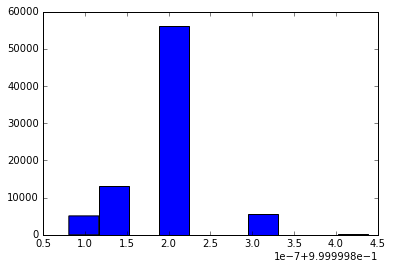

In [17]:
plt.hist(np.sum(train_output, axis=1))

In [5]:
input_tensors[0].shape

(855000, 2)

In [5]:
tensor_list = [T.tensor3() for _ in range(len(input_tensors))]

In [18]:
y = blocks.simple_multi_order_mix(tensor_list, j_input_list=[0, 2, 4, 6, 8], j_output=8)

[(0, 8), (2, 6), (2, 8), (4, 4), (4, 6), (4, 8), (6, 6), (6, 8), (8, 8)]


In [19]:
f = theano.function(inputs=tensor_list, outputs=[y])

In [8]:
import cPickle, gzip

In [11]:
import sys

In [12]:
sys.setrecursionlimit(50000)

In [20]:
j_input_list=[0, 2, 4, 6, 8]
j_output=8

In [21]:
fi = gzip.open('theano_function_multi_order_mix_'+str(j_input_list)+'_'+str(j_output)+'.pkl.gz', 'wb')
cPickle.dump(f, fi)
fi.close()

In [25]:
fi = open('theano_function_multi_order_mix_'+str(j_input_list)+'_'+str(j_output)+'high.pkl', 'wb')
cPickle.dump(f, fi, protocol=cPickle.HIGHEST_PROTOCOL)
fi.close()

In [23]:
%%time
fi = gzip.open('theano_function_multi_order_mix_'+str(j_input_list)+'_'+str(j_output)+'.pkl.gz', 'rb')
func = cPickle.load(fi)
fi.close()

CPU times: user 48.9 s, sys: 384 ms, total: 49.3 s
Wall time: 49.3 s


In [27]:
%%time
fi = open('theano_function_multi_order_mix_'+str(j_input_list)+'_'+str(j_output)+'.pkl', 'rb')
func = cPickle.load(fi)
fi.close()

CPU times: user 15.5 s, sys: 108 ms, total: 15.6 s
Wall time: 15.6 s


In [26]:
%%time
fi = open('theano_function_multi_order_mix_'+str(j_input_list)+'_'+str(j_output)+'high.pkl', 'rb')
func = cPickle.load(fi)
fi.close()

CPU times: user 15 s, sys: 128 ms, total: 15.1 s
Wall time: 15.1 s


In [9]:
out = f(*[tensor[:, :, np.newaxis] for tensor in input_tensors])[0]

In [17]:
%%time
out2 = func(*[tensor[:, :, np.newaxis] for tensor in input_tensors])[0]

CPU times: user 6.56 s, sys: 472 ms, total: 7.04 s
Wall time: 7.03 s


In [29]:
np.all(np.equal(out, out2))

True

In [18]:
[tensor[:, :, np.newaxis].shape for tensor in input_tensors] 

[(855000, 2, 1),
 (855000, 10, 1),
 (855000, 18, 1),
 (855000, 26, 1),
 (855000, 34, 1)]

In [23]:
out.shape

(855000, 10, 8)

In [24]:
j_output_list = [0, 2, 4]
out_list = []
for j in j_output_list:
    y = blocks.simple_multi_order_mix(tensor_list, j_input_list=[0, 2, 4, 6, 8], j_output=j)
    f = theano.function(inputs=tensor_list, outputs=[y])
    out = f(*[tensor[:, :, np.newaxis] for tensor in input_tensors])[0]
    out_list.append(out)

[(0, 0), (2, 2), (4, 4), (6, 6), (8, 8)]
[(0, 2), (2, 2), (2, 4), (4, 4), (4, 6), (6, 6), (6, 8), (8, 8)]
[(0, 4), (2, 2), (2, 4), (2, 6), (4, 4), (4, 6), (4, 8), (6, 6), (6, 8), (8, 8)]


In [48]:
out_list[1].shape

(855000, 10, 8)

In [30]:
out_list = blind_utils.multi_order_mix(input_tensors, 8, 8)

mixing tensors...
mixing [0, 2, 4, 6, 8]_0
compiling multi_order_mix_[0, 2, 4, 6, 8]_0
[(0, 0), (2, 2), (4, 4), (6, 6), (8, 8)]
mixing [0, 2, 4, 6, 8]_2
compiling multi_order_mix_[0, 2, 4, 6, 8]_2
[(0, 2), (2, 2), (2, 4), (4, 4), (4, 6), (6, 6), (6, 8), (8, 8)]
mixing [0, 2, 4, 6, 8]_4
compiling multi_order_mix_[0, 2, 4, 6, 8]_4
[(0, 4), (2, 2), (2, 4), (2, 6), (4, 4), (4, 6), (4, 8), (6, 6), (6, 8), (8, 8)]
mixing [0, 2, 4, 6, 8]_6
compiling multi_order_mix_[0, 2, 4, 6, 8]_6
[(0, 6), (2, 4), (2, 6), (2, 8), (4, 4), (4, 6), (4, 8), (6, 6), (6, 8), (8, 8)]
mixing [0, 2, 4, 6, 8]_8
compiling multi_order_mix_[0, 2, 4, 6, 8]_8
[(0, 8), (2, 6), (2, 8), (4, 4), (4, 6), (4, 8), (6, 6), (6, 8), (8, 8)]
tensors are mixed.


In [31]:
fodf = blind_utils.load_reconst_fodf('in8out8')


In [65]:
N=1000
train_input, train_output, test_input, test_output, input_coef = blind_utils.pre_blind_pc(out_list, fodf, N=N)

(855000, 8, 10)
(800, 5, 2)
(199, 5, 2)
(800, 8, 10)
(199, 8, 10)
(800, 10, 18)
(199, 10, 18)
(800, 10, 26)
(199, 10, 26)
(800, 9, 34)
(199, 9, 34)


In [67]:
train_input[1].shape

(800, 10, 8)

In [59]:
out_list[1].shape

(855000, 10, 8)

In [64]:
np.mean(np.linalg.norm(out_list[1], axis=1), axis=0)

array([  1.56506201e+03,   7.91542435e+01,   7.65099716e+00,
         7.16938019e-01,   1.17941320e-01,   3.70984189e-02,
         2.55011283e-02,   3.20771709e-02], dtype=float32)

In [68]:
np.mean(np.linalg.norm(train_input[1], axis=1), axis=0)

array([ 0.85605955,  0.70636261,  0.57098669,  0.47197711,  0.52300662,
        0.80088836,  0.90954405,  0.89973104], dtype=float32)